In [1]:
import numpy as np
import math
import scipy.optimize
import matplotlib.pyplot as plt

In [2]:
def objective_function(x):
    return (x[1] - 2*x[0]**2)**4 + (3 - x[0]) ** 2

In [3]:
# For results comparison to actual optimum
optim_actual = scipy.optimize.minimize(objective_function, x0=np.array([0.0,0.0]), method='Nelder-Mead')
print('Location of minimum: ', optim_actual.x)
print('Minimum: ', optim_actual.fun)

Location of minimum:  [ 2.99999995 17.99998495]
Minimum:  2.19769091734199e-15


In [13]:
# Plot optimization search history relative to actual optimum and function contours
def objective_function_contour_plot(x_history):
    x1 = x_history[:, 0]
    x2 = x_history[:, 1]
    
    # Set up contours
    x1_list = np.linspace(0.0, 4.0, 1000)
    x2_list = np.linspace(0.0, 20.0, 1000)
    X1, X2 = np.meshgrid(x1_list, x2_list)
    F = (X2 - 2*X1**2)**4 + (3 - X1) ** 2
    
    # Plot contours
    fig, ax = plt.subplots()
    contours = ax.contour(X1, X2, F, levels=np.array([1, 10, 1e2, 1e3, 1e4, 1e5]))
    ax.clabel(contours, inline=True, fontsize=8)
    
    # Show global minimum
    plt.scatter([3], [18], marker='*', s=300)
    
    # Formatting
    plt.xlabel('$x_1$',fontsize=12)
    plt.ylabel('$x_2$',fontsize=12)
    
    # Plot search history
    plt.plot(x1, x2);

In [16]:
def line_search(alpha, x_start, direction):
    return objective_function(x_start + alpha * direction)

def cyclic_coordinate_search(starting_point, max_iterations=1000, acceleration=True, verbosity=False, f_tol=1e-4):

    k = 0
    f_evaluation_count = 0
    var_count = np.size(starting_point, 0)
    search_count = var_count + int(acceleration==True)
    current_pos = starting_point

    # Set up logger
    x_history = np.zeros((max_iterations + 1, var_count))
    f_history = np.zeros((max_iterations + 1, 1))
    x_history[0,:] = current_pos
    f_history[0,:] = objective_function(current_pos)

    while k < max_iterations: 
        
        # Reset alpha vector after each cycle's acceleration step
        alpha_vector = np.zeros((var_count, ))

        for j in range(search_count):
            
            # Create search direction in unit or acceleration direction
            search_direction = np.zeros(var_count)
            if j < var_count:
                search_direction[j] = 1
            else:
                search_direction = alpha_vector
            
            if verbosity:
                print('\nIteration number: {}'.format(k+1))
                print('\tSearch direction: {}'.format(search_direction))

            # Line search along direction for alpha value
            line_search_result = scipy.optimize.minimize_scalar(line_search, 
                                                                args=(current_pos, search_direction), 
                                                                method='golden', 
                                                                options={'xtol':1e-3})
            alpha = line_search_result.x
            
            # Update cycle's search direction vector
            if j < var_count:
                alpha_vector[j] = alpha

            # Update position
            current_pos = current_pos + alpha * search_direction
            current_f = line_search_result.fun
            
            # Log history
            x_history[k+1, :] = current_pos
            f_history[k+1, 0] = current_f
            
            if verbosity:
                print('\tUpdated point', current_pos)
                print('\tCurrent function value:', current_f)
            
            f_evaluation_count = f_evaluation_count + line_search_result.nfev
            k = k + 1
        
        # Break maximum iteration loop if the found function value has converged within f_tol
        if abs(f_history[k-1,0] - f_history[k,0]) < f_tol:
                break

    x_history = x_history[:k+1, :]
    f_history = f_history[:k+1, :]
                
    print('\nDone after {} iterations.'.format(k))
    print('Current point:\t', current_pos)
    print('\nCurrent objective function value:\t', current_f)
    print('\nTotal number of function evaluations: {}'.format(f_evaluation_count))
    return x_history, f_history


Done after 96 iterations.
Current point:	 [ 2.98759735 17.80714275]

Current objective function value:	 0.00015768851935926123

Total number of function evaluations: 2321


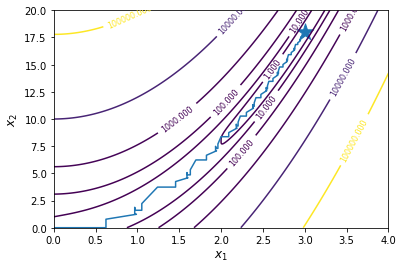

In [17]:
x_history, f_history = cyclic_coordinate_search(starting_point=np.array([0,0]), acceleration=True)
objective_function_contour_plot(x_history)


Done after 110 iterations.
Current point:	 [ 2.97667548 17.7212117 ]

Current objective function value:	 0.0005440333930105582

Total number of function evaluations: 2775


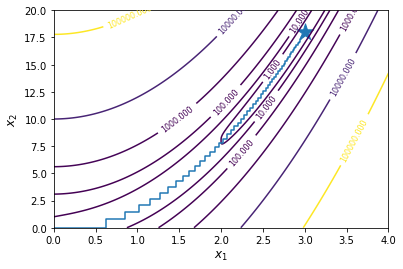

In [18]:
x_history, f_history = cyclic_coordinate_search(starting_point=np.array([0,0]), acceleration=False)
objective_function_contour_plot(x_history)